In [1]:
import pandas
from matplotlib import pyplot
from matplotlib import font_manager, rc

font = 'malgun.ttf' 
font_name = font_manager.FontProperties(fname = font).get_name()
rc('font', family = font_name)

In [12]:
df = pandas.read_excel('data/남북한_발전전력량.xlsx')
df['남북한별'] = df['남북한별'].ffill()
df2 = df.loc[[1, 2, 4, 5, 6, 7]]
df2 = df2.rename({'남북한별':'지역', '발전 전력별':'전력별'}, axis = 'columns')
df2 = df2.set_index(['지역', '전력별'])
df2

1990 1991 1992 1993  1994  1995  1996  1997  1998  1999  ...  2013  \
지역 전력별                                                            ...         
북한 수력     156  150  142  133   138   142   125   107   102   103  ...   139   
   화력     121  113  105   88    93    88    88    86    68    83  ...    82   
남한 수력      64   51   49   60    41    55    52    54    61    61  ...    84   
   화력     484  573  696  803  1022  1122  1264  1420  1195  1302  ...  3581   
   원자력    529  563  565  581   587   670   739   771   897  1031  ...  1388   
   대체에너지    -    -    -    -     -     -     -     -     -     -  ...   118   

          2014  2015  2016  2017  2018  2019  2020  2021  2022  
지역 전력별                                                          
북한 수력      130   100   128   119   128   110   128   161   166  
   화력       86    90   111   116   121   128   112    94    98  
남한 수력       78    58    66    70    73    62    71    67    73  
   화력     3427  3402  3522  3738  4018  3774  3466  3702  3618  
   원자력    1564  1648  1620  1484  1335  1459  1602  1580  1761  
   대체에너지   151   173   196   243   281   313   311   391   473  

[6 rows x 33 columns]

In [21]:
#df2_T = df2.transpose()
df2.loc[('남한', '대체에너지')] = df2.loc[('남한', '대체에너지')].replace('-', 0)
# for some data in 대체에너지 there will be a -, this probably means that there isn't data for it or it's supposed to be 0
north_total = df2.loc['북한'].sum()
south_total = df2.loc['남한'].sum()

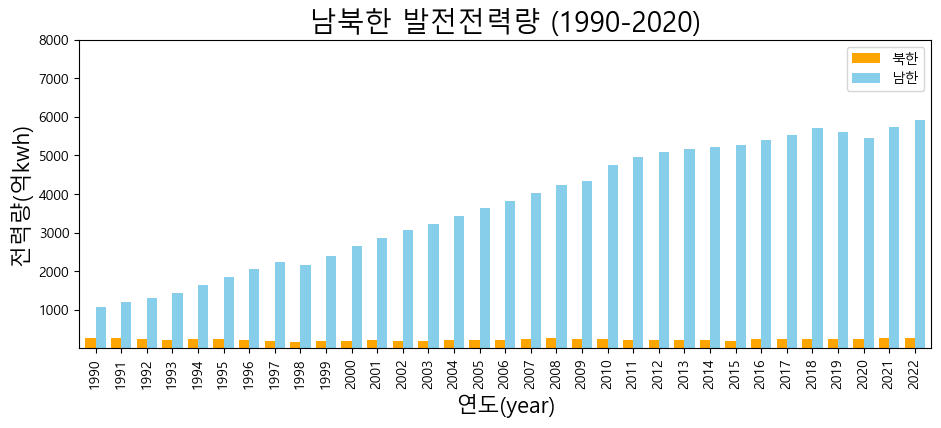

In [33]:
df2_T = df2.transpose()
df2_T[('북한', '합계')] = north_total
df2_T[('남한', '합계')] = south_total
df3 = df2_T[[('북한', '합계'), ('남한', '합계')]]
df3.columns = ['북한', '남한']
df3.plot(kind = 'bar', figsize = (11, 4), width = 0.8, color = ['orange', 'skyblue'])

pyplot.title('남북한 발전전력량 (1990-2020)', size = 20)
pyplot.xlabel('연도(year)', size = 16)
pyplot.ylabel('전력량(억kwh)', size = 16)
pyplot.ylim(9, 8000)
pyplot.show()

In [44]:
north_energy = df2_T['북한'][['수력', '화력']]
south_energy =df2_T['남한'][['수력', '화력', '원자력', '대체에너지']]

(0.0, 400.0)

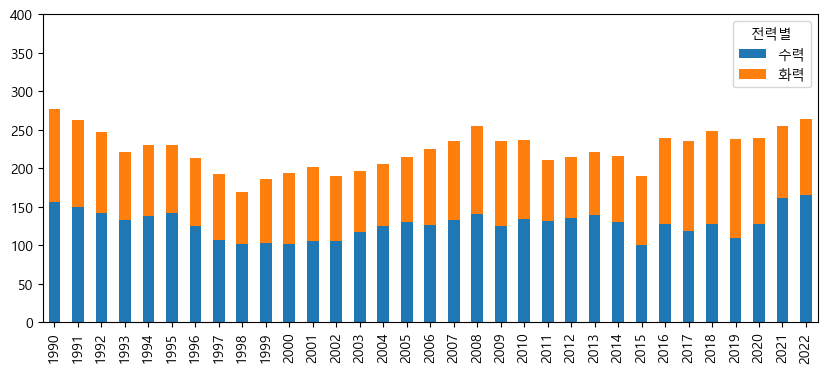

In [41]:
north_energy.plot(kind = 'bar', figsize = (10, 4), stacked = True)
pyplot.ylim(0, 400)

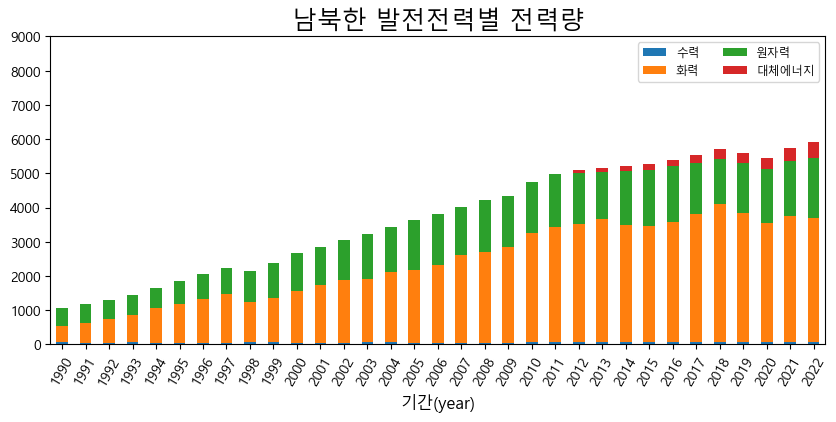

In [57]:
south_energy.plot(kind = 'bar', figsize = (10, 4), stacked = True)
pyplot.title('남북한 발전전력별 전력량', size = 18)
pyplot.xticks(rotation = 60)
pyplot.xlabel('기간(year)', size = 12)
pyplot.ylim(0, 9000)
pyplot.legend(loc = 'best', ncols = 2, fontsize = 8.5)

In [63]:
# this dataset looks at car models from 1980 to 1982, their weight, horsepower, acceleration, model year etc 
# 1 is america, 2 is europe, and 3 is Japan
car = pandas.read_csv('data/auto-mpg.csv')
car_origin = car['origin'].value_counts() #shows all the values in this column, by default python only shows the first five and the last five
car_origin.index = ['usa', 'jpn', 'eu']
car_origin

usa    249
jpn     79
eu      70
Name: count, dtype: int64

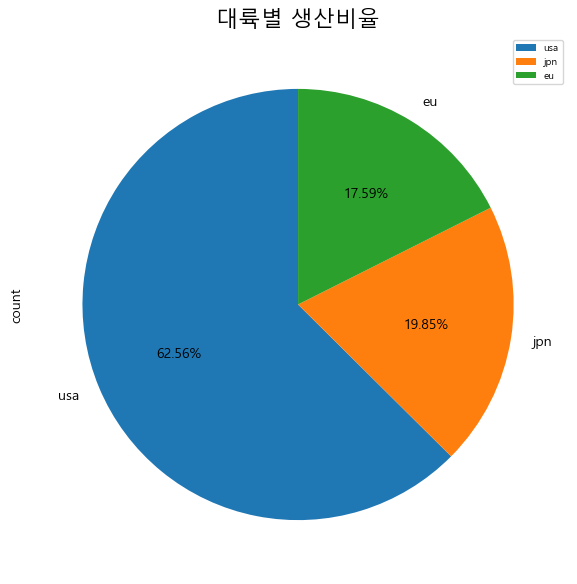

In [84]:
car_origin.plot(kind = 'pie', autopct = '%.2f%%', startangle = 90, figsize = (7, 7))
pyplot.title('대륙별 생산비율', size = 16)
pyplot.legend(loc = 'best', fontsize = 7)
pyplot.show()

In [75]:
rate = 89.1357
#want to round up to 89.14%, different methods below:
print('비율1: %.2f%%'%rate) 
print('비율2: {:.2f}%'.format(rate))
print(f'비율3: {rate:.2f}%')

비율1: 89.14%
비율2: 89.14%
비율3: 89.14%


In [86]:
car[['mpg', 'displacement', 'weight']].corr()

,mpg,displacement,weight
mpg,1.000000,-0.804203,-0.831741
displacement,-0.804203,1.000000,0.932824
weight,-0.831741,0.932824,1.000000


<Axes: xlabel='weight', ylabel='mpg'>

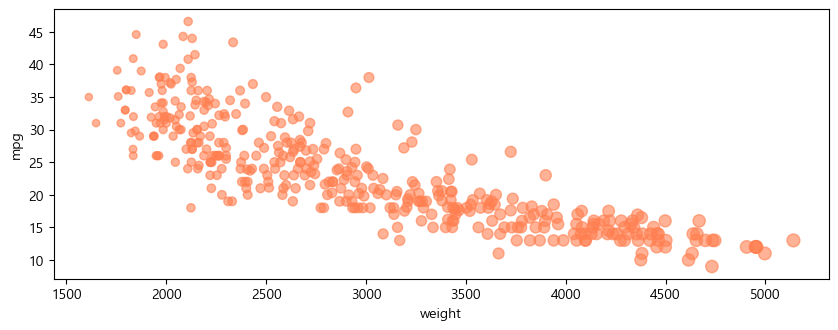

In [98]:
weight_size = car['weight'] / 60

car.plot(kind = 'scatter', x = 'weight', y = 'mpg', figsize = (10, 3.5), s = weight_size, c = 'coral', alpha = 0.6)

In [95]:
print(car['weight'].max() / 50)
print(car['weight'].min() / 50)

102.8
32.26
